## Causal Inference Project

#### Target variable: the employee attrition rate
#### Treatment: compensation and benefits type 2/type 3; a total of 2664 type 2 as treatment A, 1456 type3 as control
#### X variables: 37 variables after making categorical data into dummy variables


In [1]:
import numpy as np 
import pandas as pd 

df = pd.read_csv("/Users/dreama.wmy/Documents/McGill/INSY_695_ML/Train.csv")

In [2]:
pd.set_option('display.max_columns', None) # Show all the columns
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [3]:
df["Compensation_and_Benefits"].value_counts()

type2    3945
type3    2382
type4     353
type0     187
type1     133
Name: Compensation_and_Benefits, dtype: int64

type2    3945
type3    2382
type4     353
type0     187
type1     133
Name: Compensation_and_Benefits, dtype: int64

#### since we have most of compensation and benefits for type2 and type3, we will use this as the treatment see if the compensation and benefits will impact the employee attrition rate with other features.

In [4]:
df = df[df["Compensation_and_Benefits"].isin(['type2','type3'])]

In [5]:
df.shape

(6327, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6327 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                6327 non-null   object 
 1   Gender                     6327 non-null   object 
 2   Age                        5956 non-null   float64
 3   Education_Level            6327 non-null   int64  
 4   Relationship_Status        6327 non-null   object 
 5   Hometown                   6327 non-null   object 
 6   Unit                       6327 non-null   object 
 7   Decision_skill_possess     6327 non-null   object 
 8   Time_of_service            6196 non-null   float64
 9   Time_since_promotion       6327 non-null   int64  
 10  growth_rate                6327 non-null   int64  
 11  Travel_Rate                6327 non-null   int64  
 12  Post_Level                 6327 non-null   int64  
 13  Pay_Scale                  6318 non-null   float

In [7]:
df.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,5956.000000,6327.000000,6196.000000,6327.000000,6327.000000,6327.000000,6327.000000,6318.000000,6318.000000,6327.000000,5807.000000,6327.000000,5730.000000,6327.000000,6327.000000,6327.000000,6327.000000
mean,39.600403,3.187293,13.413815,2.364786,47.051525,0.818713,2.803856,5.999683,2.391421,3.098783,-0.012914,-0.012126,1.889529,2.831990,7.104631,3.256046,0.188173
std,13.635269,1.063808,10.406282,1.149308,15.742630,0.650526,1.162540,2.061505,1.120775,0.835058,0.993920,0.986897,0.528647,0.938212,1.165063,0.924190,0.183812
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.069650
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142600
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.234700
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


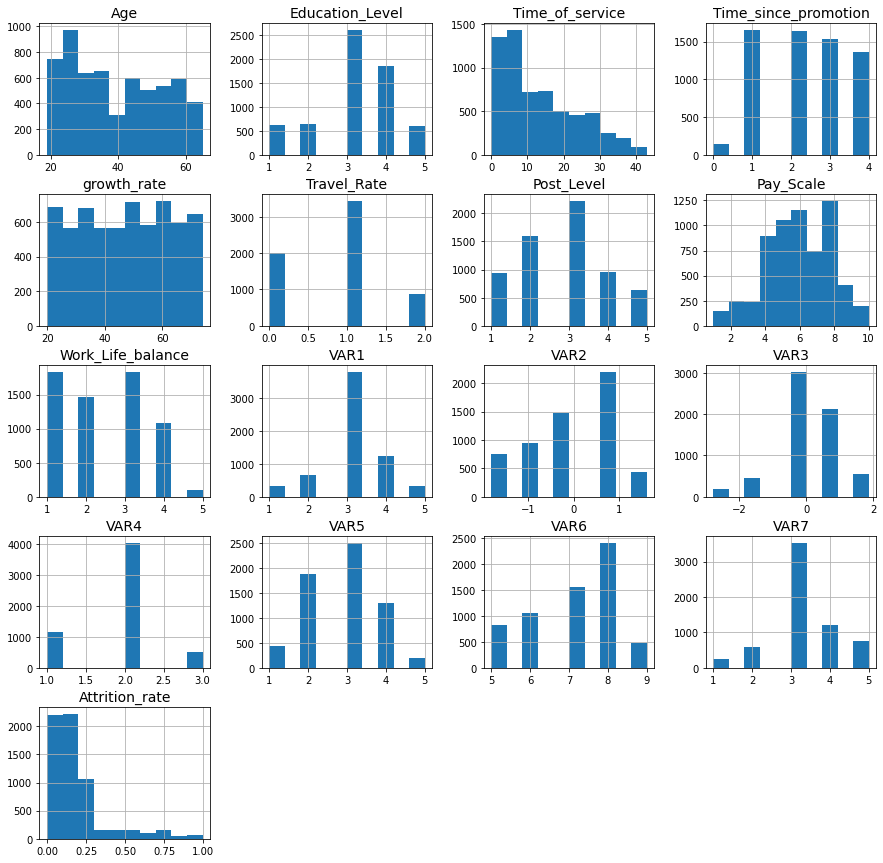

In [8]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(figsize=(15, 15))
plt.show()

In [9]:
df.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          371
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              131
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance              9
VAR1                           0
VAR2                         520
VAR3                           0
VAR4                         597
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [10]:
t = []
for i in df.Compensation_and_Benefits:
    if i == 'type2':
        t.append(1)
    else:
        t.append(0)

In [11]:
df['treatment'] = t
df.head(3)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,treatment
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,1
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,1
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,1


In [12]:
df = df.drop(columns=['Compensation_and_Benefits'])
df.head(3)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,treatment
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,1
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,1
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,1


In [13]:
#make categrical data to dummy variables
df = pd.get_dummies(df, columns = ["Gender",'Relationship_Status','Hometown',
                                    'Unit','Decision_skill_possess'], drop_first = True) 

In [14]:
df.head(3)

,Employee_ID,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,treatment,Gender_M,Relationship_Status_Single,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
0,EID_23371,42.0,4,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,EID_18000,24.0,3,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,EID_3891,58.0,3,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [15]:
df.shape

(6327, 39)

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [17]:
df2 = train_set.copy()

In [18]:
train_set.corr()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,treatment,Gender_M,Relationship_Status_Single,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
Age,1.000000,-0.000723,0.919303,0.131538,0.005228,0.028228,0.016613,-0.001702,-0.009530,0.001208,0.013461,0.010389,0.001446,0.010600,0.003031,0.006666,-0.012046,0.003664,-0.004467,-0.005190,0.025049,0.019863,-0.024956,-0.024092,0.005151,0.013812,-0.003727,0.028428,-0.003441,-0.026800,-0.003779,-0.008112,0.004464,0.009526,-0.015784,0.017782,0.003045,-0.003243
Education_Level,-0.000723,1.000000,-0.008573,-0.014834,-0.003809,-0.011202,0.005514,-0.003937,-0.013973,-0.006417,-0.009279,-0.014791,0.011619,-0.003810,-0.005467,0.011305,-0.010235,0.018458,-0.000070,0.002852,-0.001966,0.020290,-0.021592,0.003996,0.005831,-0.025021,-0.002878,0.001458,0.013754,-0.014095,0.013082,0.004071,-0.011551,-0.002689,0.011008,0.013779,-0.033325,0.001962
Time_of_service,0.919303,-0.008573,1.000000,0.124280,0.000012,0.023834,0.012784,0.011715,-0.012559,0.003669,0.008879,0.014641,-0.001500,0.016077,0.010814,0.006577,-0.013244,-0.001715,-0.004741,-0.001444,0.024960,0.020563,-0.015283,-0.032475,-0.007888,0.008253,0.000120,0.022550,-0.002261,-0.010474,0.003850,0.002066,0.002790,0.003829,-0.019349,0.017104,-0.000636,0.002605
Time_since_promotion,0.131538,-0.014834,0.124280,1.000000,0.004408,0.006459,-0.012248,-0.015567,0.001504,-0.011044,0.004657,-0.000592,0.007585,0.002135,0.006676,-0.001998,0.008838,-0.004519,-0.012009,0.003781,0.009578,-0.008103,0.000251,0.006233,0.008917,-0.007791,0.006334,0.030780,0.005226,-0.001222,-0.012977,0.031270,-0.011960,-0.009862,0.018560,0.026309,-0.037470,0.018599
growth_rate,0.005228,-0.003809,0.000012,0.004408,1.000000,0.015102,-0.007433,-0.009167,-0.018766,-0.004255,0.011477,0.011063,0.020388,-0.008725,-0.005313,-0.024128,0.015350,0.002193,-0.010011,-0.007444,0.009390,-0.023183,0.000024,0.019868,0.020207,-0.014015,-0.010028,0.008389,0.010825,-0.033664,0.006220,-0.009714,0.003002,-0.005669,0.014054,-0.021857,-0.009156,0.012812
Travel_Rate,0.028228,-0.011202,0.023834,0.006459,0.015102,1.000000,0.037108,-0.018059,0.001705,0.022199,0.008936,0.004705,0.002814,-0.004399,-0.007345,-0.010000,-0.004713,0.007822,0.012936,0.004888,-0.002961,-0.004244,-0.011018,0.003308,-0.006920,0.017163,-0.005342,-0.007048,-0.013439,0.000480,0.003942,-0.009557,0.013842,0.011839,0.006206,0.000869,0.014442,-0.011671
Post_Level,0.016613,0.005514,0.012784,-0.012248,-0.007433,0.037108,1.000000,0.030285,-0.010989,-0.007566,-0.010263,0.011037,-0.003868,0.003584,0.012323,-0.009753,0.018608,-0.001634,0.001722,0.018225,-0.013630,0.003090,0.008630,0.005131,-0.012505,-0.019726,0.022232,0.002828,-0.021358,-0.003024,-0.003677,0.024569,0.001808,0.011612,0.001299,0.029860,-0.001664,-0.009885
Pay_Scale,-0.001702,-0.003937,0.011715,-0.015567,-0.009167,-0.018059,0.030285,1.000000,-0.023546,0.011306,0.013360,-0.006292,-0.006391,0.017546,-0.015207,0.008847,-0.011464,-0.011933,-0.001962,0.014950,0.020104,-0.024569,0.021593,-0.021630,-0.002451,-0.016555,0.006274,0.005974,0.015007,-0.009368,0.009043,0.006887,-0.013522,-0.000516,0.005812,0.006829,0.000295,0.011206
Work_Life_balance,-0.009530,-0.013973,-0.012559,0.001504,-0.018766,0.001705,-0.010989,-0.023546,1.000000,-0.011564,0.007710,0.004229,-0.029791,0.016626,0.007031,0.021437,0.011185,0.026309,0.001412,-0.006952,0.007824,-0.013776,0.010385,-0.018138,-0.011672,0.025655,-0.009559,-0.010726,-0.011371,-0.012803,0.008461,-0.018895,-0.020557,0.005608,0.025943,-0.013104,-0.006162,0.012609
VAR1,0.001208,-0.006417,0.003669,-0.011044,-0.004255,0.022199,-0.007566,0.011306,-0.011564

In [19]:
train_set.corr()['Attrition_rate'].sort_values(ascending=False)

Attrition_rate                       1.000000
Gender_M                             0.028258
Decision_skill_possess_Conceptual    0.019057
Post_Level                           0.018608
Decision_skill_possess_Directive     0.018341
Unit_Operarions                      0.017996
VAR3                                 0.016725
Unit_R&D                             0.015634
growth_rate                          0.015350
Work_Life_balance                    0.011185
Unit_Sales                           0.009083
Time_since_promotion                 0.008838
Hometown_Franklin                    0.006303
treatment                            0.005607
Unit_Production                      0.004752
Relationship_Status_Single           0.003695
Unit_Purchasing                      0.001239
Unit_Security                        0.001082
Unit_Human Resource Management       0.000881
VAR6                                -0.001436
Unit_Quality                        -0.001472
Hometown_Springfield              

In [20]:
df2 = train_set.drop("Attrition_rate", axis=1)
df2_labels = train_set["Attrition_rate"].copy()

df2 = df2.drop(columns=['Employee_ID'])

In [21]:
null_rows_idx = df2.isnull().any(axis=1)

In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

df2 = df2.select_dtypes(include=[np.number])

imputer.fit(df2)

SimpleImputer(strategy='median')

In [23]:
X = imputer.transform(df2)

In [24]:
df2 = pd.DataFrame(X, columns=df2.columns,
                          index=df2.index)

In [25]:
df2.loc[null_rows_idx].head(5)

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,treatment,Gender_M,Relationship_Status_Single,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
3683,65.0,3.0,10.0,1.0,35.0,1.0,3.0,1.0,2.0,4.0,-0.1048,-0.4537,2.0,2.0,7.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2166,38.0,4.0,14.0,3.0,41.0,0.0,4.0,5.0,2.0,4.0,-0.1048,-0.4537,2.0,2.0,7.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4028,26.0,5.0,4.0,1.0,37.0,2.0,4.0,5.0,3.0,4.0,-1.8176,-0.4537,2.0,4.0,6.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2304,23.0,5.0,4.0,1.0,32.0,0.0,3.0,2.0,3.0,3.0,-0.9612,-0.4537,2.0,4.0,5.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6507,24.0,3.0,5.0,4.0,60.0,2.0,2.0,7.0,2.0,3.0,-0.1048,0.7075,2.0,3.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
df2.shape

(5061, 37)

In [27]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [28]:
df2.shape

(5061, 37)

In [29]:
df2 = df2.iloc[outlier_pred == 1]
df2_labels = df2_labels.iloc[outlier_pred == 1]

In [30]:
df2.shape

(4120, 37)

In [31]:
df2_labels.shape

(4120,)

In [32]:
df2.columns

Index(['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion',
       'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'treatment', 'Gender_M', 'Relationship_Status_Single',
       'Hometown_Franklin', 'Hometown_Lebanon', 'Hometown_Springfield',
       'Hometown_Washington', 'Unit_Human Resource Management', 'Unit_IT',
       'Unit_Logistics', 'Unit_Marketing', 'Unit_Operarions',
       'Unit_Production', 'Unit_Purchasing', 'Unit_Quality', 'Unit_R&D',
       'Unit_Sales', 'Unit_Security', 'Decision_skill_possess_Behavioral',
       'Decision_skill_possess_Conceptual',
       'Decision_skill_possess_Directive'],
      dtype='object')

In [74]:
treatment.value_counts()

1.0    2664
0.0    1456
Name: treatment, dtype: int64

In [75]:
df2.shape

(4120, 37)

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings

from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor
from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
from causalml.match import NearestNeighborMatch, MatchOptimizer, create_table_one
from causalml.propensity import ElasticNetPropensityModel
from causalml.dataset import *
from causalml.metrics import *

import shap
import time
from sklearn.inspection import permutation_importance
import os

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'  # for lightgbm to work

%reload_ext autoreload
%autoreload 2
%matplotlib inline

Failed to import duecredit due to No module named 'duecredit'


In [35]:
import causalml
print(causalml.__version__)

0.13.0


## 2. Average Treatment Effect (ATE) Estimation with S, T, X, and R Learners

In [36]:
y = df2_labels
X = df2.drop(columns=['treatment'])

In [37]:
treatment = df2['treatment']

In [38]:
# Ready-to-use S-Learner using LinearRegression
learner_s = LRSRegressor()
ate_s = learner_s.estimate_ate(X=X, treatment=treatment, y=y)
print(ate_s)
print('ATE estimate: {:.03f}'.format(ate_s[0][0]))
print('ATE lower bound: {:.03f}'.format(ate_s[1][0]))
print('ATE upper bound: {:.03f}'.format(ate_s[2][0]))

# After calling estimate_ate, add pretrain=True flag to skip training
# This flag is applicable for other meta learner
ate_s = learner_s.estimate_ate(X=X, treatment=treatment, y=y, pretrain=True)
print(ate_s)
print('ATE estimate: {:.03f}'.format(ate_s[0][0]))
print('ATE lower bound: {:.03f}'.format(ate_s[1][0]))
print('ATE upper bound: {:.03f}'.format(ate_s[2][0]))

(array([0.00319429]), array([-0.00856767]), array([0.01495625]))
ATE estimate: 0.003
ATE lower bound: -0.009
ATE upper bound: 0.015
(array([0.00319429]), array([-0.00856767]), array([0.01495625]))
ATE estimate: 0.003
ATE lower bound: -0.009
ATE upper bound: 0.015


In [39]:
# Ready-to-use T-Learner using XGB
learner_t = XGBTRegressor()
ate_t = learner_t.estimate_ate(X=X, treatment=treatment, y=y)
print('Using the ready-to-use XGBTRegressor class')
print(ate_t)

# Calling the Base Learner class and feeding in XGB
learner_t = BaseTRegressor(learner=XGBRegressor())
ate_t = learner_t.estimate_ate(X=X, treatment=treatment, y=y)
print('\nUsing the BaseTRegressor class and using XGB (same result):')
print(ate_t)

# Calling the Base Learner class and feeding in LinearRegression
learner_t = BaseTRegressor(learner=LinearRegression())
ate_t = learner_t.estimate_ate(X=X, treatment=treatment, y=y)
print('\nUsing the BaseTRegressor class and using Linear Regression (different result):')
print(ate_t)

Using the ready-to-use XGBTRegressor class
(array([-0.00238832]), array([-0.00843405]), array([0.00365742]))

Using the BaseTRegressor class and using XGB (same result):
(array([-0.00238832]), array([-0.00843405]), array([0.00365742]))

Using the BaseTRegressor class and using Linear Regression (different result):
(array([0.00355616]), array([-0.00810653]), array([0.01521884]))


In [40]:
# X Learner without propensity score input
# Calling the Base Learner class and feeding in XGB
learner_x = BaseXRegressor(XGBRegressor())
ate_x = learner_x.estimate_ate(X=X, treatment=treatment, y=y)
print('Using the BaseXRegressor class and using XGB without propensity score input:')
print(ate_x)

# Calling the Base Learner class and feeding in LinearRegression
learner_x = BaseXRegressor(learner=LinearRegression())
ate_x = learner_x.estimate_ate(X=X, treatment=treatment, y=y)
print('\nUsing the BaseXRegressor class and using Linear Regression without propensity score input:')
print(ate_x)

Using the BaseXRegressor class and using XGB without propensity score input:
(array([0.00179165]), array([-0.00222936]), array([0.00581267]))

Using the BaseXRegressor class and using Linear Regression without propensity score input:
(array([0.00355616]), array([-0.00810653]), array([0.01521884]))


In [41]:
# R Learner without propensity score input
# Calling the Base Learner class and feeding in XGB
learner_r = BaseRRegressor(learner=XGBRegressor())
ate_r = learner_r.estimate_ate(X=X, treatment=treatment, y=y)
print('Using the BaseRRegressor class and using XGB without propensity score input:')
print(ate_r)

# Calling the Base Learner class and feeding in LinearRegression
learner_r = BaseRRegressor(learner=LinearRegression())
ate_r = learner_r.estimate_ate(X=X, treatment=treatment, y=y)
print('Using the BaseRRegressor class and using Linear Regression without propensity score input:')
print(ate_r)

Using the BaseRRegressor class and using XGB without propensity score input:
(array([-0.01301545]), array([-0.01325901]), array([-0.01277188]))
Using the BaseRRegressor class and using Linear Regression without propensity score input:
(array([0.00360257]), array([0.00341807]), array([0.00378706]))


## 3.  Individual Treatment Effect (ITE/CATE)

In [69]:
# S Learner
learner_s = LRSRegressor()
cate_s = learner_s.fit_predict(X=X, treatment=treatment, y=y)

# S Learner with XGB
learner_s_xgb = BaseSRegressor(learner=XGBRegressor())
cate_s_xgb = learner_s_xgb.fit_predict(X=X, treatment=treatment, y=y)

# T Learner
#learner_t = BaseTRegressor(learner=XGBRegressor())
learner_t = XGBTRegressor()
cate_t = learner_t.fit_predict(X=X, treatment=treatment, y=y)

# X Learner without propensity score input
learner_x_no_p = BaseXRegressor(learner=XGBRegressor())
cate_x_no_p = learner_x_no_p.fit_predict(X=X, treatment=treatment, y=y)

# R Learner without propensity score input
learner_r_no_p = BaseRRegressor(learner=XGBRegressor())
cate_r_no_p = learner_r_no_p.fit_predict(X=X, treatment=treatment, y=y)

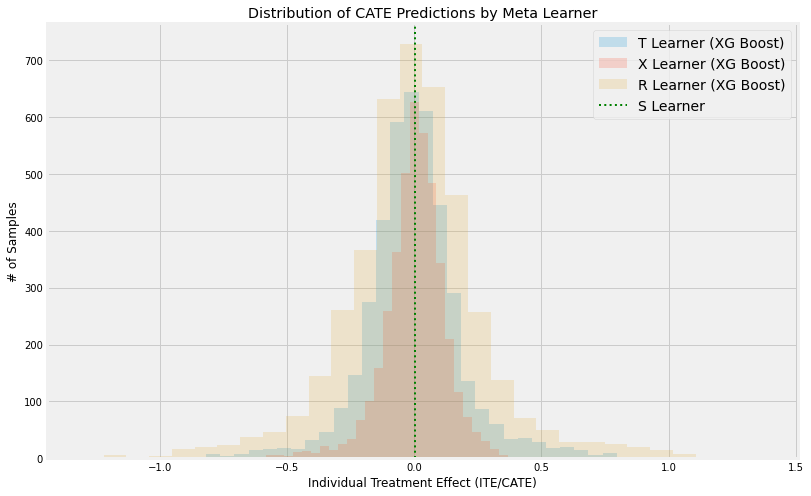

In [71]:
alpha=0.2
bins=30
plt.figure(figsize=(12,8))
plt.hist(cate_t, alpha=alpha, bins=bins, label='T Learner (XG Boost)')
plt.hist(cate_x_no_p, alpha=alpha, bins=bins, label='X Learner (XG Boost)')
plt.hist(cate_r_no_p, alpha=alpha, bins=bins, label='R Learner (XG Boost)')

plt.axvline(x=cate_s[0] ,color="green", linestyle="dotted", label = "S Learner", linewidth=2)

plt.title('Distribution of CATE Predictions by Meta Learner')
plt.xlabel('Individual Treatment Effect (ITE/CATE)')
plt.ylabel('# of Samples')
_=plt.legend()

From the plot above, XG Boost with T learner is in the middle kind of a normal distribution.

In [44]:
# X Learner with Linear Regression without propensity score input
learner_x = BaseXRegressor(learner=LinearRegression())
cate_x = learner_x.fit_predict(X=X, treatment=treatment, y=y)

In [45]:
# R Learner with linear regression without propensity score input
learner_r = BaseRRegressor(learner=LinearRegression())
cate_r = learner_r.fit_predict(X=X, treatment=treatment, y=y)

In [72]:
# T Learner with linear regression 
learner_t_lr = BaseTRegressor(learner=LinearRegression())
cate_t_lr = learner_t_lr.fit_predict(X=X, treatment=treatment, y=y)

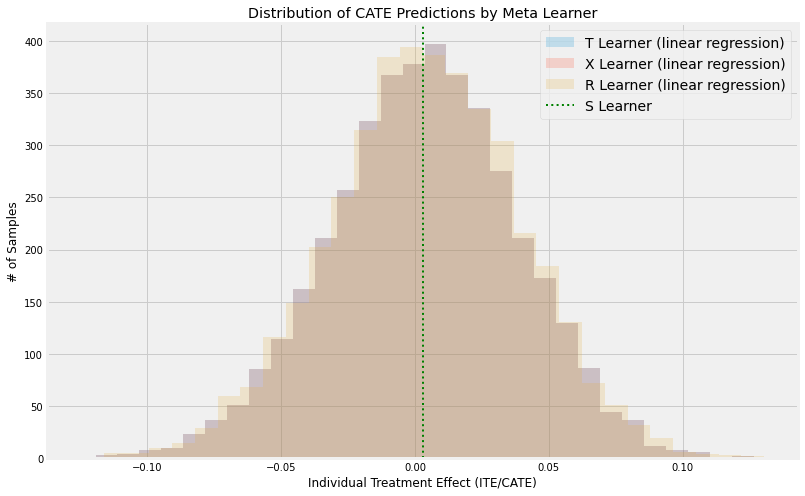

In [73]:
alpha=0.2
bins=30
plt.figure(figsize=(12,8))
#plt.hist(cate_t, alpha=alpha, bins=bins, label='T Learner (XG Boost)')
#plt.hist(cate_x_no_p, alpha=alpha, bins=bins, label='X Learner (XG Boost)')
#plt.hist(cate_r_no_p, alpha=alpha, bins=bins, label='R Learner (XG Boost)')

plt.hist(cate_t_lr, alpha=alpha, bins=bins, label='T Learner (linear regression)')
plt.hist(cate_x, alpha=alpha, bins=bins, label='X Learner (linear regression)')
plt.hist(cate_r, alpha=alpha, bins=bins, label='R Learner (linear regression)')

plt.axvline(x=cate_s[0] ,color="green", linestyle="dotted", label = "S Learner", linewidth=2)

plt.title('Distribution of CATE Predictions by Meta Learner')
plt.xlabel('Individual Treatment Effect (ITE/CATE)')
plt.ylabel('# of Samples')
_=plt.legend()

From the plot above, we can see that the distribution of linear regression with T, X, and R learners has approximately a similar distribution area.

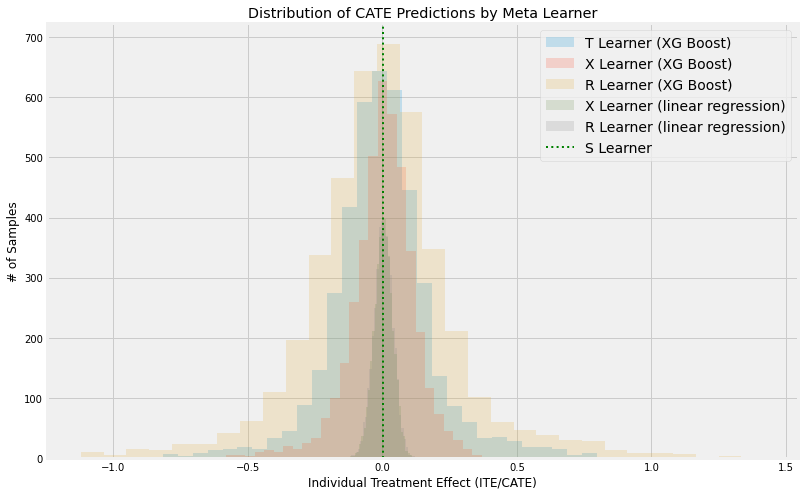

In [46]:
alpha=0.2
bins=30
plt.figure(figsize=(12,8))
plt.hist(cate_t, alpha=alpha, bins=bins, label='T Learner (XG Boost)')
plt.hist(cate_x_no_p, alpha=alpha, bins=bins, label='X Learner (XG Boost)')
plt.hist(cate_r_no_p, alpha=alpha, bins=bins, label='R Learner (XG Boost)')

plt.hist(cate_x, alpha=alpha, bins=bins, label='X Learner (linear regression)')
plt.hist(cate_r, alpha=alpha, bins=bins, label='R Learner (linear regression)')

plt.axvline(x=cate_s[0] ,color="green", linestyle="dotted", label = "S Learner", linewidth=2)

plt.title('Distribution of CATE Predictions by Meta Learner')
plt.xlabel('Individual Treatment Effect (ITE/CATE)')
plt.ylabel('# of Samples')
_=plt.legend()

Set type 2 benefits as treatment A, type 3 benefits control variable. 

In [47]:
# treatment A = type2; control is type3
w_multi = df2.treatment.replace({1:"treatment_A",0:"control"})
w_multi

4630    treatment_A
1304        control
5173        control
2800    treatment_A
1486    treatment_A
           ...     
4163    treatment_A
5744    treatment_A
5787    treatment_A
5971    treatment_A
972     treatment_A
Name: treatment, Length: 4120, dtype: object

## 4. LRSRegressor with S Learner

In [48]:
base_algo = LGBMRegressor()

slearner = BaseSRegressor(base_algo, control_name='control')
slearner.estimate_ate(X, w_multi, y)

array([-0.00017004])

In [49]:
slearner_tau = slearner.fit_predict(X, w_multi, y)

In [50]:
# Feature name
feature_names = []
for col in X.columns:
    feature_names.append(col)
feature_names

['Age',
 'Education_Level',
 'Time_of_service',
 'Time_since_promotion',
 'growth_rate',
 'Travel_Rate',
 'Post_Level',
 'Pay_Scale',
 'Work_Life_balance',
 'VAR1',
 'VAR2',
 'VAR3',
 'VAR4',
 'VAR5',
 'VAR6',
 'VAR7',
 'Gender_M',
 'Relationship_Status_Single',
 'Hometown_Franklin',
 'Hometown_Lebanon',
 'Hometown_Springfield',
 'Hometown_Washington',
 'Unit_Human Resource Management',
 'Unit_IT',
 'Unit_Logistics',
 'Unit_Marketing',
 'Unit_Operarions',
 'Unit_Production',
 'Unit_Purchasing',
 'Unit_Quality',
 'Unit_R&D',
 'Unit_Sales',
 'Unit_Security',
 'Decision_skill_possess_Behavioral',
 'Decision_skill_possess_Conceptual',
 'Decision_skill_possess_Directive']

### 4.1 Feature Importance (method = auto)

In [51]:
slearner.get_importance(X=X, 
                        tau=slearner_tau,
                        normalize=True, 
                        method='auto', 
                        features=feature_names)

{'treatment_A': Age                                  0.176110
 Time_of_service                      0.168839
 growth_rate                          0.136089
 VAR2                                 0.116212
 Pay_Scale                            0.064150
 Decision_skill_possess_Behavioral    0.044256
 Post_Level                           0.033570
 Decision_skill_possess_Conceptual    0.028088
 Time_since_promotion                 0.025294
 Gender_M                             0.022648
 Hometown_Lebanon                     0.021593
 Work_Life_balance                    0.021531
 Hometown_Washington                  0.018478
 VAR3                                 0.018204
 Travel_Rate                          0.013700
 Education_Level                      0.012956
 VAR1                                 0.011362
 Hometown_Franklin                    0.011036
 Decision_skill_possess_Directive     0.009233
 Unit_Marketing                       0.008924
 Relationship_Status_Single           0.00822

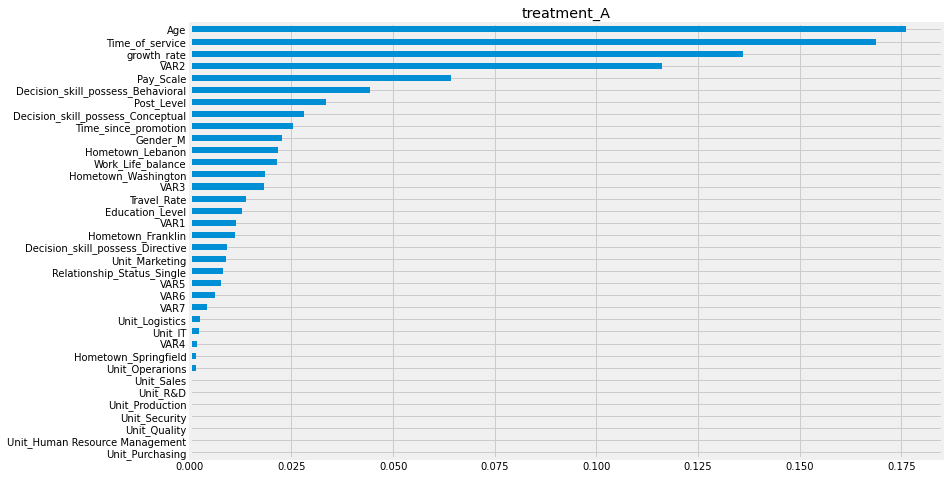

In [52]:
slearner.plot_importance(X=X, 
                         tau=slearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

From the plot of feature importance with the auto method, we can tell the age, time of service, growth rate, VAR 2, and pay scale are the top 5 most important features. And most of the unit department is not important at all, except marketing and logistics.

### 4.2 Feature Importance (method = permutation)

In [53]:
slearner.get_importance(X=X, 
                        tau=slearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

{'treatment_A': Age                                  0.453895
 VAR2                                 0.237048
 growth_rate                          0.235713
 Decision_skill_possess_Behavioral    0.191395
 Time_of_service                      0.189140
 Gender_M                             0.123172
 Pay_Scale                            0.109239
 Post_Level                           0.086282
 Decision_skill_possess_Conceptual    0.053488
 Work_Life_balance                    0.044017
 VAR3                                 0.037967
 Time_since_promotion                 0.033069
 Unit_Marketing                       0.030531
 Hometown_Lebanon                     0.029340
 Hometown_Washington                  0.027679
 Travel_Rate                          0.017247
 Education_Level                      0.015293
 Hometown_Franklin                    0.014969
 Relationship_Status_Single           0.010276
 VAR1                                 0.009518
 Unit_Logistics                       0.00616

In [54]:
start_time = time.time()

slearner.get_importance(X=X, 
                        tau=slearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

print("Elapsed time: %s seconds" % (time.time() - start_time))

Elapsed time: 1.4146549701690674 seconds


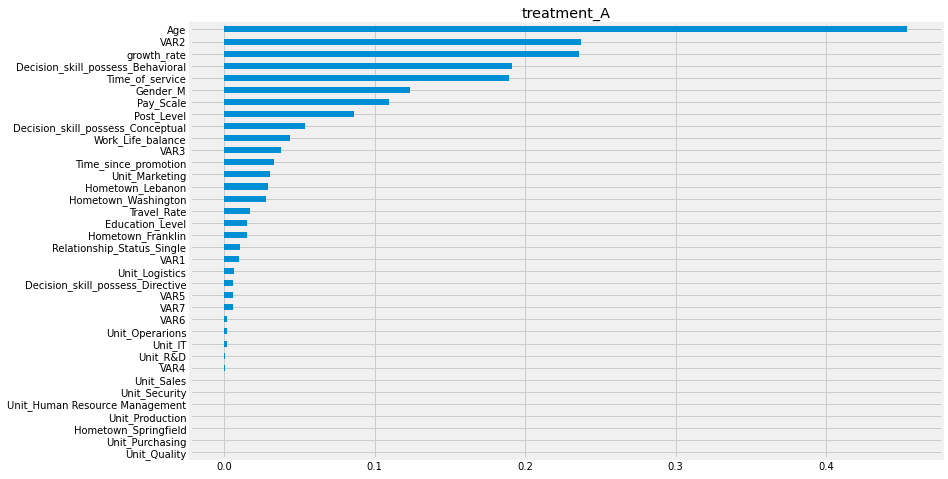

In [55]:
slearner.plot_importance(X=X, 
                         tau=slearner_tau, 
                         method='permutation', 
                         features=feature_names, 
                         random_state=42)


From the plot of feature importance with the permutation method, we can tell the age, VAR2, growth rate, decision skill possess behavioral, and time of service are the top 5 important features. And most of the unit department is not important at all, except marketing and logistics.

### 4.3 Shapley Values

In [56]:
shap_slearner = slearner.get_shap_values(X=X, tau=slearner_tau)
shap_slearner

{'treatment_A': array([[ 4.20124773e-04, -1.62704510e-04, -7.68232116e-04, ...,
          1.94321436e-03, -2.22928611e-04, -6.31464166e-05],
        [-2.26009568e-03,  3.23209070e-05, -8.92868136e-04, ...,
         -3.72718233e-03, -1.98283750e-04,  6.35994311e-05],
        [-2.11751927e-03,  1.11721464e-04, -5.34579210e-04, ...,
          5.81248562e-04, -1.56480598e-04,  1.76000923e-05],
        ...,
        [-1.56682442e-03,  1.00347035e-04, -1.73406875e-03, ...,
          1.63065265e-03, -2.84538356e-04,  7.62208078e-05],
        [-1.10496365e-03,  2.24559941e-04, -7.02059059e-04, ...,
          2.79960227e-03, -2.07066463e-04, -1.52644572e-04],
        [-9.48356055e-04,  1.22130361e-04, -8.24299608e-04, ...,
          1.50381354e-03, -3.09649589e-04,  1.47081210e-04]])}

In [57]:
np.mean(np.abs(shap_slearner['treatment_A']),axis=0)

array([2.48546479e-03, 2.95392661e-04, 1.73223865e-03, 4.25046450e-04,
       2.06711906e-03, 2.95845285e-04, 1.53730317e-03, 1.11877468e-03,
       8.04675348e-04, 3.80387830e-04, 1.37486676e-03, 5.12342336e-04,
       8.70586262e-05, 4.52115480e-04, 2.97499935e-04, 2.80169229e-04,
       1.59876972e-03, 3.99186528e-04, 4.55061831e-04, 4.99535856e-04,
       7.83607491e-05, 4.31572078e-04, 0.00000000e+00, 1.42790528e-04,
       2.34011590e-04, 4.04079402e-04, 1.88428798e-04, 2.85890965e-05,
       0.00000000e+00, 7.29478810e-06, 3.23068380e-05, 4.89975433e-05,
       2.49751913e-05, 2.06928206e-03, 5.93612563e-04, 1.94676124e-04])

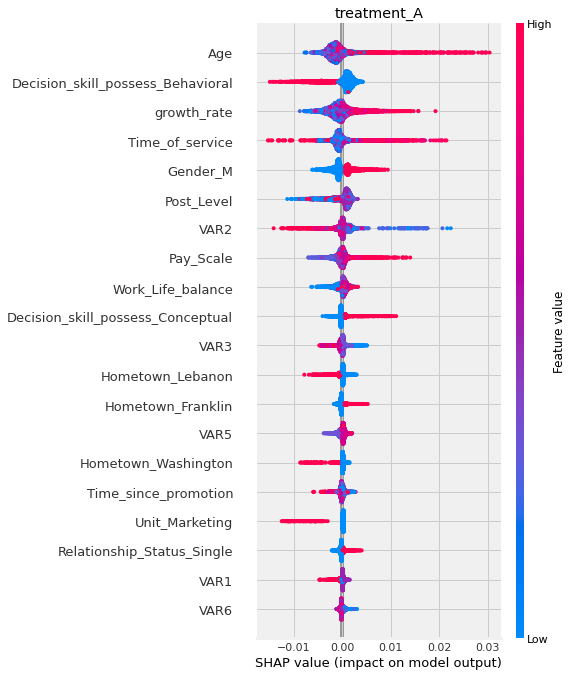

In [58]:
# Plot shap values without specifying shap_dict
slearner.plot_shap_values(X=X, tau=slearner_tau, features=feature_names)

Age is the most important feature. Higher age affects the predictions in a positive direction, and lower age affects the predictions in a negative direction. We can state that the younger employee has a lower attrition rate. The second important feature is that the employee possess behavioral decision skill. When the employee has the more behavioral skill, it affects the predictions in a negative direction.

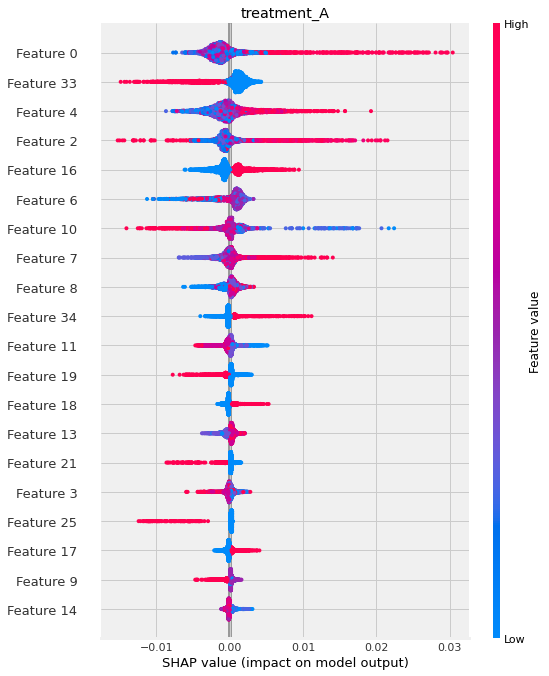

In [59]:
# Plot shap values WITH specifying shap_dict
slearner.plot_shap_values(X=X, shap_dict=shap_slearner)

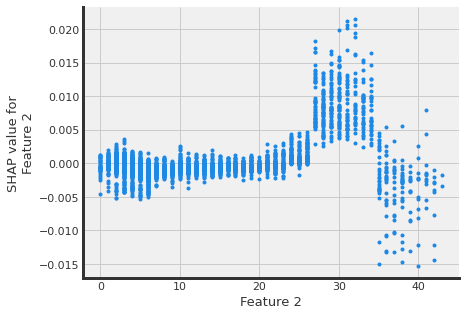

In [60]:
# interaction_idx set to None (no color coding for interaction effects)
slearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx=2,
                              X=X,
                              tau=slearner_tau,
                              interaction_idx=None,
                              shap_dict=shap_slearner)

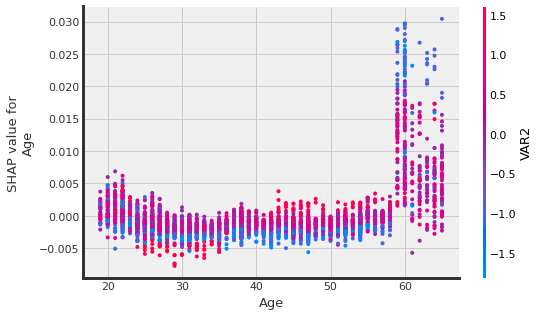

In [98]:
# interaction_idx set to 'auto' (searches for feature with greatest approximate interaction)
# specify feature names
slearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx=0,
                              X=X,
                              tau=slearner_tau,
                              interaction_idx='auto',
                              shap_dict=shap_slearner,
                              features=feature_names)

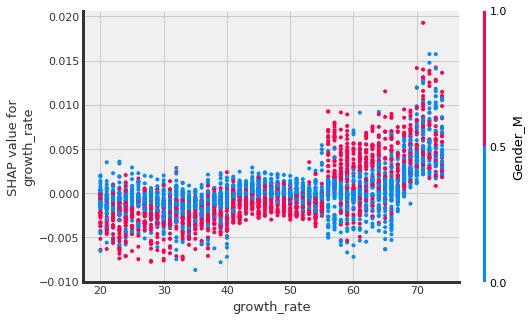

In [100]:
# interaction_idx set to 'auto' (searches for feature with greatest approximate interaction)
# specify feature names
slearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx=4,
                              X=X,
                              tau=slearner_tau,
                              interaction_idx='auto',
                              shap_dict=shap_slearner,
                              features=feature_names)

The strong interaction with age is VAR2. The strong interaction with growth rate is gender. When the growth rate is less than 55, the female employee has a higher shape value than the male. But when the growth rate is more than 55, the male has a higher SHAP value than the female employee. 

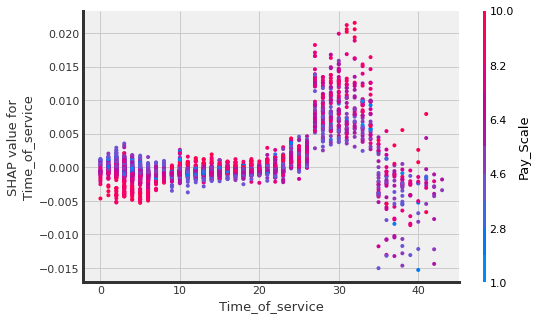

In [101]:
# interaction_idx set to specific index
slearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx=2,
                              X=X,
                              tau=slearner_tau,
                              interaction_idx='auto',
                              shap_dict=shap_slearner, 
                              features=feature_names)

## 5. XGBTRegressor with T Learner 

In [63]:
tlearner = BaseTRegressor(XGBRegressor(), control_name='control')
tlearner.estimate_ate(X, w_multi, y)

(array([-0.00238832]), array([-0.00843405]), array([0.00365742]))

In [64]:
tlearner_tau = tlearner.fit_predict(X, w_multi, y)


### 5.1 Feature Importance (method = auto)


In [65]:
tlearner.get_importance(X=X, 
                        tau=tlearner_tau, 
                        normalize=True, 
                        method='auto', 
                        features=feature_names)


{'treatment_A': growth_rate                          0.157369
 Age                                  0.112003
 Time_of_service                      0.096252
 Pay_Scale                            0.061319
 Work_Life_balance                    0.055884
 VAR1                                 0.052479
 VAR2                                 0.045774
 Post_Level                           0.043502
 Education_Level                      0.034704
 Time_since_promotion                 0.031124
 Gender_M                             0.030508
 VAR6                                 0.028302
 VAR5                                 0.024987
 VAR3                                 0.023779
 Travel_Rate                          0.021433
 VAR7                                 0.019254
 Decision_skill_possess_Conceptual    0.014404
 Decision_skill_possess_Behavioral    0.012467
 Hometown_Washington                  0.011294
 Hometown_Franklin                    0.010928
 Unit_Marketing                       0.01072

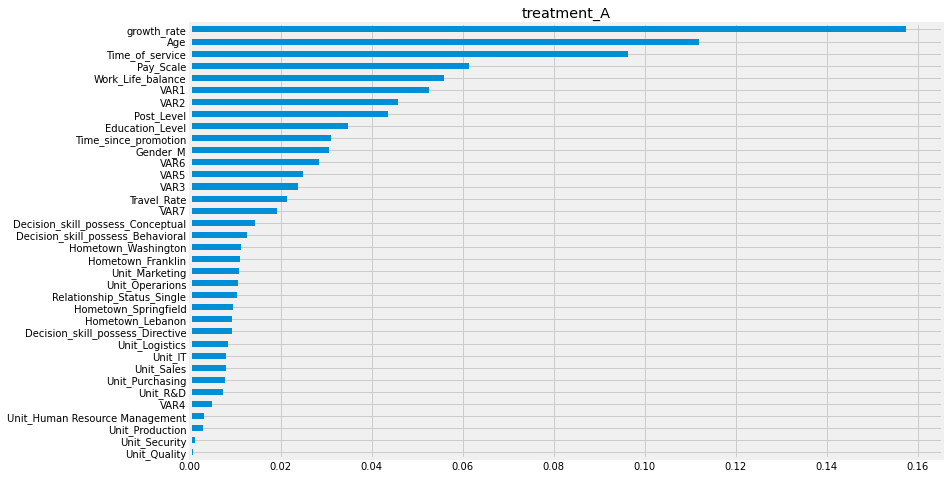

In [66]:
tlearner.plot_importance(X=X, 
                         tau=tlearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

### 5.2 Feature Importance (method = permutation)

In [67]:
tlearner.get_importance(X=X, 
                        tau=tlearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

{'treatment_A': growth_rate                          0.068870
 Time_of_service                      0.053898
 Age                                  0.041725
 Education_Level                      0.028248
 VAR1                                 0.021336
 Post_Level                           0.021227
 Unit_Marketing                       0.015862
 Decision_skill_possess_Behavioral    0.015111
 Travel_Rate                          0.012633
 Gender_M                             0.012538
 Work_Life_balance                    0.010349
 Decision_skill_possess_Conceptual    0.010252
 Pay_Scale                            0.009672
 Hometown_Washington                  0.009052
 Unit_Operarions                      0.008933
 VAR2                                 0.008137
 Unit_Purchasing                      0.006498
 VAR7                                 0.005992
 Decision_skill_possess_Directive     0.005846
 Relationship_Status_Single           0.005844
 VAR3                                 0.00554

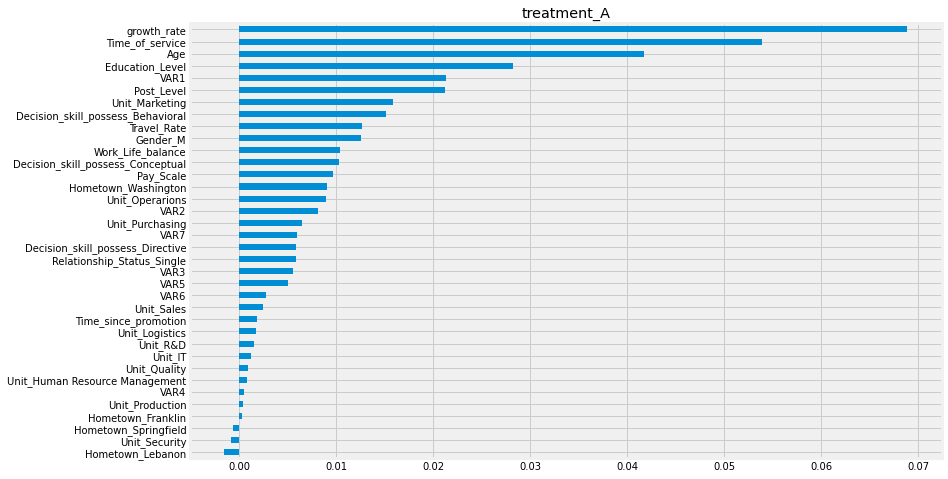

In [68]:
tlearner.plot_importance(X=X, 
                         tau=tlearner_tau, 
                         method='permutation', 
                         features=feature_names, 
                         random_state=42)

### 5.3 Shapley Values

In [102]:
shap_tlearner = tlearner.get_shap_values(X=X, tau=tlearner_tau)
shap_tlearner

{'treatment_A': array([[ 0.00060164,  0.0013009 , -0.01392697, ...,  0.00113201,
          0.00173095, -0.00230053],
        [-0.00460099, -0.00669155, -0.00042177, ..., -0.02791755,
         -0.00391215, -0.0002045 ],
        [ 0.00136947,  0.00730015, -0.00055961, ...,  0.00590389,
         -0.00045585, -0.0003699 ],
        ...,
        [-0.0147693 ,  0.00267718, -0.00434461, ...,  0.00653622,
         -0.0052403 , -0.00019167],
        [-0.00175713,  0.00372515,  0.0226024 , ...,  0.01506478,
         -0.00100705,  0.01289656],
        [ 0.00247   , -0.00217101, -0.00102807, ...,  0.01003052,
         -0.00424622, -0.00074407]])}

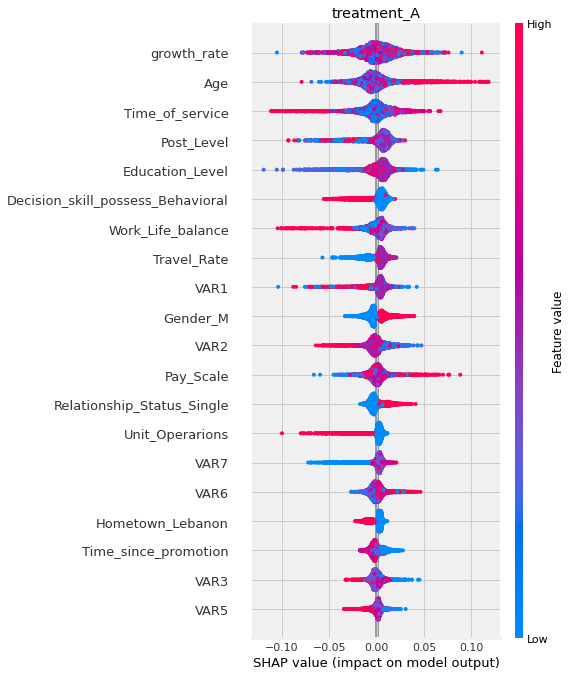

In [103]:
# Plot shap values without specifying shap_dict
tlearner.plot_shap_values(X=X, tau=tlearner_tau, features=feature_names)

Growth rate is the most important feature. But it is hard to tell the relationship between the growth rate and the prediction direction. The second important feature is age. Higher age affects the predictions in a positive direction, and lower age affects the predictions in a negative direction. We can state that the younger employee has a lower attrition rate. The third important feature is the time of service in the company. The less time of service will affect the predictions in a negative direction. 

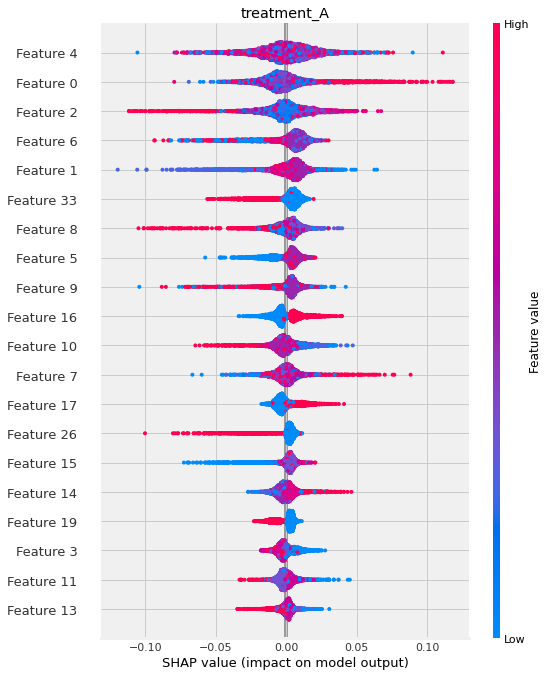

In [107]:
# Plot shap values WITH specifying shap_dict
tlearner.plot_shap_values(X=X, shap_dict=shap_tlearner)

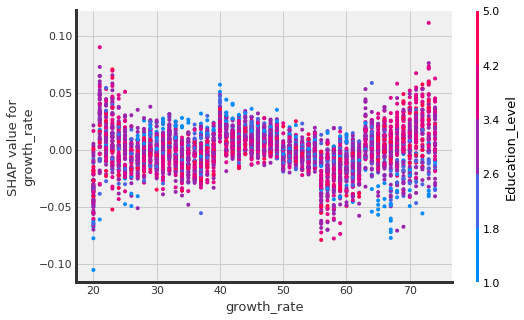

In [108]:
# interaction_idx set to 'auto' (searches for feature with greatest approximate interaction)
# specify feature names
tlearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx=4,
                              X=X,
                              tau=tlearner_tau,
                              interaction_idx='auto',
                              shap_dict=shap_tlearner,
                              features=feature_names)

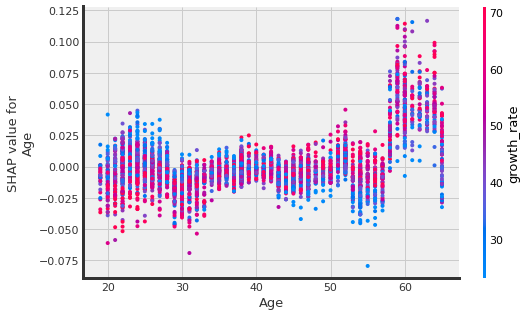

In [109]:
# interaction_idx set to 'auto' (searches for feature with greatest approximate interaction)
# specify feature names
tlearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx=0,
                              X=X,
                              tau=tlearner_tau,
                              interaction_idx='auto',
                              shap_dict=shap_tlearner,
                              features=feature_names)

The strong interaction with the growth rate is education level. The strong interaction with age is the growth rate. Less growth rate will stand out when the age is less than 30. When the age is between 40-60, the less growth rate employee has a lower SHAP value.

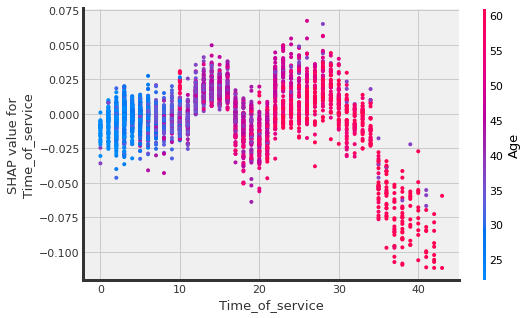

In [110]:
# interaction_idx set to 'auto' (searches for feature with greatest approximate interaction)
# specify feature names
tlearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx=2,
                              X=X,
                              tau=tlearner_tau,
                              interaction_idx='auto',
                              shap_dict=shap_tlearner,
                              features=feature_names)

The strong interaction with a time of service is the age. They have a clear relationship that when the time of service is lower than 10, the age of the employee is below 35. Longer the service time, the older the age. The SHAP value for the time of service becomes negative when the age is between 30-40+ with a higher time of service.

END.